<img src="images/tennisballbounce1.jpg" alt="Drawing" style="width: 600px;"/><img src="images/rafashot.jpg" alt="Drawing" style="width: 492px;"/>

## ATP Match Study: How ATP Players Win Matches

[Write intro here]
Like most sports, tennis is replete with statistics. Some are interesting for spectators; others useful for players coaches. Some may be only for tennis geeks or trivia enthusiasts. For this project, I wanted to see if I could find any match specific statistics that could potentially differentiate between tennis match winners and losers. Is there one thing, or perhaps a few things, that players and coaches could use to improve their chances to win more matches.

### The Stats We Measured

Here's how I performed this study.

I took data from 88,249 matches from ATP tournaments from 1991 to 2015 and divided it into two categories: 1) match winner and 2) match loser.

For each match, I collected 17 stats per player:

 -  \# of aces
 -  \# of double faults
 -  \# of first serves in
 -  total # of first serves
 -  \# of first serve points won
 -  total # of first serve points
 -  \# of second points won
 -  total # of second serve points
 -  \# of service points won
 -  total # of service points
 -  \# of first serve return points won
 -  total # of first serve return points
 -  \# of second serve return points won
 -  total # of second serve return points
 -  total # of points won
 -  total # of service games
 -  total # of return games
 -  total # of points won
 
 Additionally, I calculated six additional match statistics for each player. The reason for creating these additional statistics is to allow for relative comparisons, since the winners statistics from a raw values perspective is much different between 6-0, 6-0 match and a 7-6, 6-7, 7-6, 6-7, 7-6 match. 
 
 -  ace percentage
 -  double fault percentage
 -  service points won percentage
 -  return points won percentage
 -  break points won percentage
 -  total points won percentage

Lastly, I calculated the difference between the winners' and losers percentages for each of these six statistics plus the rank difference between the winner and loser.

There are several more statistics that I would have liked to have had. Perhaps on the next project. For now, let's take a look at what we've got.

In [1]:
import pandas as pd, csv, matplotlib.pyplot as plt, numpy as np, seaborn as sns, sklearn as sk
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Import Match Statistics and Results csv files.
statsdf = pd.read_csv('data/matchstats.csv')
results = pd.read_csv('data/result.csv')

In [3]:
# statsdf = statsdf.drop(['Unnamed: 0'], axis = 1)
# results = results.drop(['Unnamed: 0'], axis = 1)

In [4]:
# Set some sensible display options for data investigation
pd.options.display.max_columns = 40
pd.options.display.max_rows = 500

In [5]:
# Define Main Columns for different types of data frames
main_eda_stats = ['winner_ace_pct','loser_ace_pct','winner_df_pct','loser_df_pct','winner_firstsrv_in_pct',
                   'loser_firstsrv_in_pct','winner_firstsrv_won_pct','loser_firstsrv_won_pct',
                   'winner_secondsrv_won_pct','loser_secondsrv_won_pct','winner_srv_pts_pct','loser_srv_pts_pct',
                   'winner_rtn_pts_pct','loser_rtn_pts_pct','winner_brk_pts_pct','loser_brk_pts_pct','winner_points_won_pct',
                   'loser_points_won_pct']
main_cols_stats = ['rank_dif','winner_ace_pct','loser_ace_pct','ace_dif','winner_df_pct','loser_df_pct','df_dif','winner_firstsrv_in_pct',
                   'loser_firstsrv_in_pct','firstsrv_in_dif','winner_firstsrv_won_pct','loser_firstsrv_won_pct','firstsrv_won_dif',
                   'winner_secondsrv_won_pct','loser_secondsrv_won_pct','secondsrv_won_dif','winner_srv_pts_pct','loser_srv_pts_pct','srv_pts_dif',
                   'winner_rtn_pts_pct','loser_rtn_pts_pct','rtn_pts_dif','winner_brk_pts_pct','loser_brk_pts_pct','brk_pts_dif', 'winner_points_won_pct',
                   'loser_points_won_pct', 'total_points_pct_dif']
main_cols_winner = ['winner_aces','winner_double_faults','winner_first_serves_in','winner_first_serves_total','winner_first_serve_points_won','winner_first_serve_points_total',
                    'winner_second_serve_points_won','winner_second_serve_points_total','winner_break_points_saved','winner_break_points_serve_total',
                    'winner_service_points_won','winner_service_points_total','winner_first_serve_return_won','winner_first_serve_return_total',
                    'winner_second_serve_return_won','winner_second_serve_return_total','winner_break_points_converted','winner_break_points_converted',
                    'winner_service_games_played','winner_return_games_played','winner_return_points_won','winner_return_points_total','winner_total_points_won',
                    'winner_total_points_total']
main_cols_loser = ['loser_aces','loser_double_faults','loser_first_serves_in','loser_first_serves_total','loser_first_serve_points_won','loser_first_serve_points_total',
                   'loser_second_serve_points_won','loser_second_serve_points_total','loser_break_points_saved','loser_break_points_serve_total','loser_service_points_won',
                   'loser_service_points_total','loser_first_serve_return_won','loser_first_serve_return_total','loser_second_serve_return_won',
                   'loser_second_serve_return_total','loser_break_points_converted','loser_break_points_converted','loser_service_games_played',
                   'loser_return_games_played','loser_return_points_won','loser_return_points_total','loser_total_points_won','loser_total_points_total']

## First let's look at some overall match statistics.

In [6]:
print('The average match lasts ' + str(round(statsdf['match_duration'].mean(),2)) + ' minutes.')
print('On average, the matches had a total of ' + str(round(statsdf['winner_total_points_total'].mean(),2)) + ' points played.')
print('On average, the match had a total of ' + str(round( (statsdf['winner_games_won'].mean() + statsdf['loser_games_won'].mean() ) ,2) ) + ' games played.')

The average match lasts 104.61 minutes.
On average, the matches had a total of 157.04 points played.
On average, the match had a total of 24.63 games played.


In [7]:
statsdf[main_cols_stats].describe().T

,count,mean,std,min,25%,50%,75%,max
rank_dif,88206.0,29.128869,87.778525,-298.000000,-18.000000,22.000000,70.000000,299.000000
winner_ace_pct,88206.0,8.340684,6.336654,0.000000,3.676471,6.976744,11.538462,56.756757
loser_ace_pct,88206.0,5.599402,4.661899,0.000000,2.127660,4.587156,7.865169,40.000000
ace_dif,88206.0,2.741282,7.339634,-31.668052,-1.708619,2.085035,6.666667,55.002371
winner_df_pct,88206.0,3.471327,2.647796,0.000000,1.612903,3.076923,4.938272,26.027397
loser_df_pct,88206.0,4.511130,3.174744,0.000000,2.150538,4.000000,6.250000,35.416667
df_dif,88206.0,-1.039803,3.907960,-35.416667,-3.340081,-0.891303,1.458333,18.987342
winner_firstsrv_in_pct,88206.0,58.351252,14.343813,0.000000,54.054054,60.112715,66.019417,100.000000
loser_firstsrv_in_pct,88206.0,58.864649,8.704818,21.276596,53.061224,58.762887,64.583333,100.000000
firstsrv_in_dif,88206.0,-0.513397,16.062541,-94.252874,-6.781920,1.209677,8.834452,59.333001


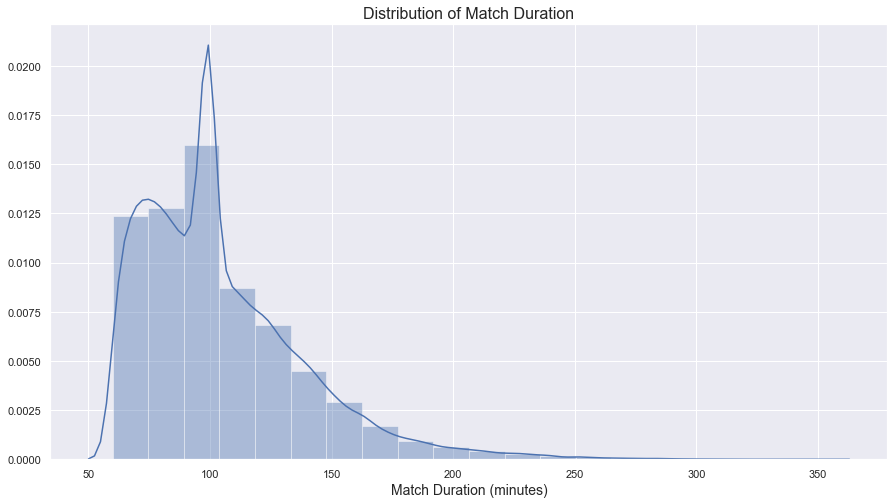

In [8]:
sns.set(color_codes=True)
plt.figure(figsize=(15,8))
sns.distplot(statsdf['match_duration'],bins=20, kde=True).set_title('Distribution of Match Duration',fontsize=16);
plt.xlabel('Match Duration (minutes)',fontsize=14)
plt.savefig("pics/matchduration.png")

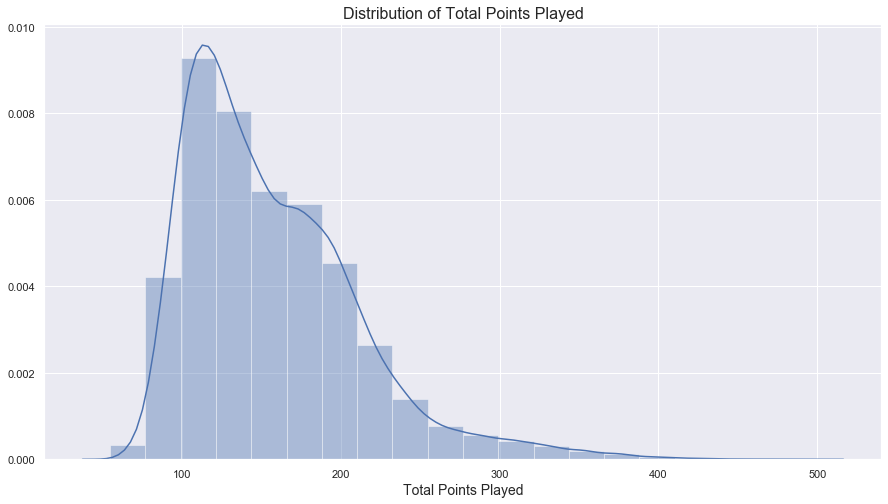

In [9]:
sns.set(color_codes=True)
plt.figure(figsize=(15,8))
sns.distplot(statsdf['winner_total_points_total'],bins=20, axlabel='Total Points Played').set_title('Distribution of Total Points Played',fontsize=16);
plt.xlabel('Total Points Played',fontsize=14)
plt.savefig("pics/totalpointsplayed.png")

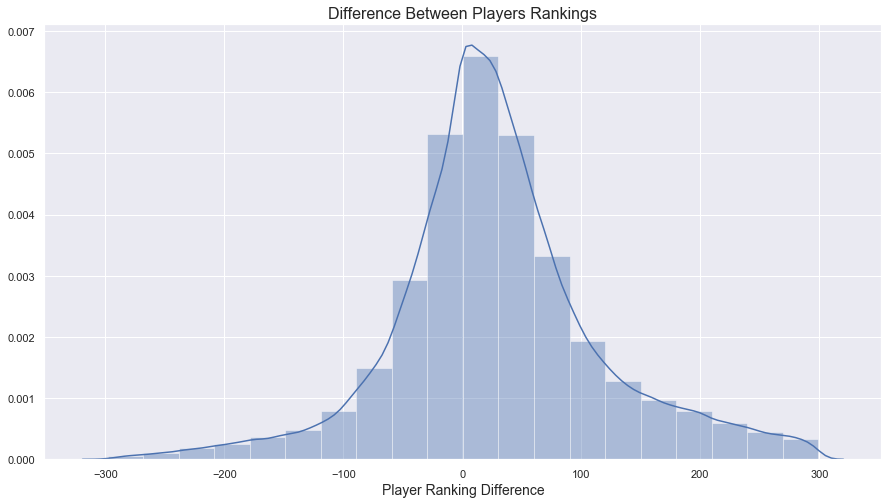

In [10]:
sns.set(color_codes=True)
plt.figure(figsize=(15,8))
sns.distplot(statsdf['rank_dif'],bins=20).set_title('Difference Between Players Rankings',fontsize=16);
plt.xlabel('Player Ranking Difference',fontsize=14)
plt.savefig("pics/rankingdifference.png")

C:\Users\ironm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ironm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ironm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

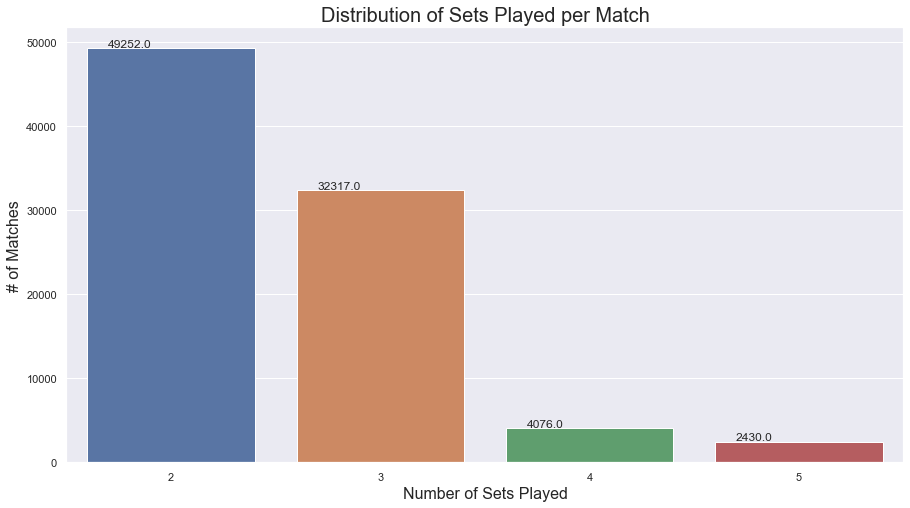

In [11]:
df = statsdf[['year','winner_sets_won','loser_sets_won']]
df['sets'] = df['winner_sets_won'] + df['loser_sets_won']
df['year'] = pd.Categorical(df.year)
df['sets'] = pd.Categorical(df.sets)

plt.figure(figsize=(15,8))
ax = sns.countplot(x="sets", data=df, order=[2,3,4,5])
plt.title('Distribution of Sets Played per Match',fontsize=20)
plt.xlabel('Number of Sets Played',fontsize=16)
plt.ylabel('# of Matches',fontsize=16)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+150))
plt.savefig("pics/setsplayedbarchart.png")

In [12]:
df = statsdf[['year','winner_sets_won','loser_sets_won']]
df['sets'] = df['winner_sets_won'] + df['loser_sets_won']

print(df['sets'].sum() / len(df['sets']))

print(49252/len(df['sets']))

2.5398498968324152
0.5583747137382944


C:\Users\ironm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df = statsdf[['winner_sets_won','loser_sets_won']]
len(df.loc[df['winner_sets_won'] == 3 & (df['loser_sets_won'] == 0)])

131

C:\Users\ironm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ironm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ironm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

<Figure size 1080x576 with 0 Axes>

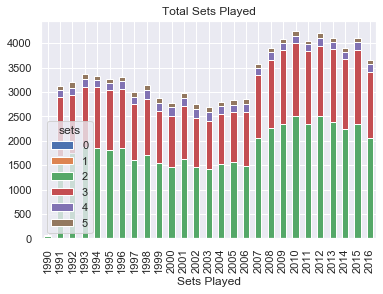

<Figure size 432x288 with 0 Axes>

In [14]:
df = statsdf[['year','winner_sets_won','loser_sets_won']]
df['sets'] = df['winner_sets_won'] + df['loser_sets_won']
df['year'] = pd.Categorical(df.year)
df['sets'] = pd.Categorical(df.sets)

plt.figure(figsize=(15,8))
ct = pd.crosstab(df.year, df.sets)
ct.plot.bar(stacked=True)
plt.title('Total Sets Played')
plt.xlabel('Sets Played')
plt.show()
plt.savefig("pics/setsplayedbarchartbyyear.png")

In [15]:
print('The winner won an average of ' + str(round(statsdf['winner_points_won_pct'].mean(),2)) + ' percent of the points, or '
      + str(round(statsdf['winner_total_points_won'].mean(),2)) + ' points.')
print('On average, the loser won ' + str(round(statsdf['loser_points_won_pct'].mean(),2)) + ' percent of the points, or '
      + str(round(statsdf['loser_total_points_won'].mean(),2)) + ' points.')
print('A difference of ' + str(round( ( statsdf['winner_points_won_pct'].mean() - statsdf['loser_points_won_pct'].mean()),2)) + ' percent, or '
      + str(round((statsdf['winner_total_points_won'].mean() - statsdf['loser_total_points_won'].mean()),2)) + ' points.')

total_games_played = round( (statsdf['winner_games_won'].mean() + statsdf['loser_games_won'].mean() ),2)
points_difference = round( (statsdf['winner_total_points_won'].mean() - statsdf['loser_total_points_won'].mean() ),2)
points_per_game_difference = round((points_difference / total_games_played),2)

print('This is a difference of only ' + str(points_per_game_difference) + ' points per game.' )

The winner won an average of 55.47 percent of the points, or 85.69 points.
On average, the loser won 44.53 percent of the points, or 71.37 points.
A difference of 10.94 percent, or 14.32 points.
This is a difference of only 0.58 points per game.


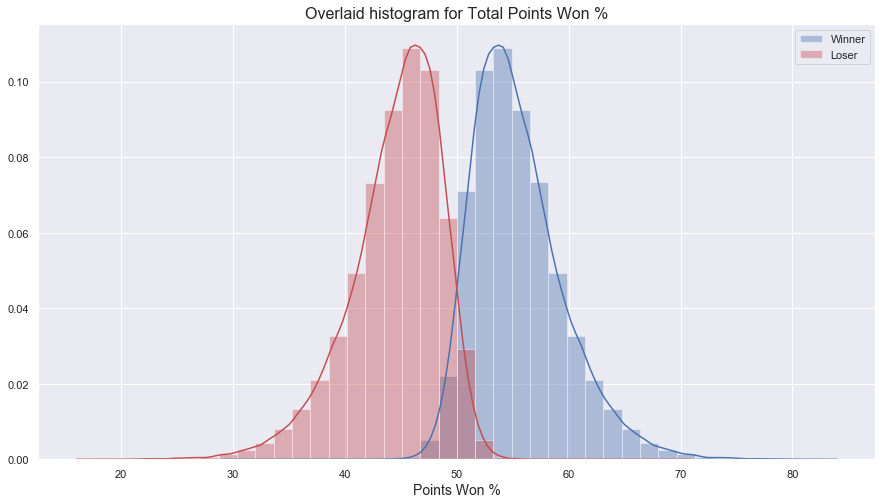

<Figure size 432x288 with 0 Axes>

In [16]:
won = statsdf['winner_points_won_pct']
lost = statsdf['loser_points_won_pct']

plt.figure(figsize=(15,8))
xmin = min(min(won), min(lost))
xmax = max(max(won), max(lost))
width = (xmax - xmin) / 40
sns.distplot(won, color='b', bins=np.arange(xmin, xmax, width))
sns.distplot(lost, color='r', bins=np.arange(xmin, xmax, width))
plt.legend(['Winner','Loser'])
plt.title('Overlaid histogram for Total Points Won %',fontsize=16)
plt.xlabel('Points Won %',fontsize=14)
plt.show()
plt.savefig("pics/totalpointshist.png")

In [17]:
# Calculate how many times the winner won more points than the match loser.
x1 = len(statsdf[statsdf['winner_points_won_pct'] > statsdf['loser_points_won_pct']])
y1 = len(statsdf)
z1 = round(((x1/y1) * 100),1)
print(x1,"matches out of",y1,"matches, or",z1,"%")
print("The match winner won more total points than the match loser " + str(z1) +'%' + " percent of the time.")

# Calculate how many times the winner won more points than the match loser in 3 set matches.
x2 = len(statsdf[(statsdf['winner_points_won_pct'] > statsdf['loser_points_won_pct']) & (statsdf['loser_sets_won'] > 0)])
y2 = len(statsdf[statsdf['loser_sets_won'] > 0])
z2 = round(((x2/y2) * 100),1)
print(x2,"matches out of",y2,"matches, or",z2,"%")
print("In matches with 3 or more sets, the winner won more total points than the loser " + str(z2) +'%' + " percent of the time.")

83166 matches out of 88206 matches, or 94.3 %
The match winner won more total points than the match loser 94.3% percent of the time.
27915 matches out of 32729 matches, or 85.3 %
In matches with 3 or more sets, the winner won more total points than the loser 85.3% percent of the time.


In [18]:
# Calculate how many times the winner won more points than the match loser.
x1 = len(statsdf[statsdf['rank_dif'] < 0])
y1 = len(statsdf)
z1 = round(((x1/y1) * 100),1)
print(x1,"matches out of",y1,"matches, or",z1,"%")
print("The lower ranked player won  " + str(z1) +'%' + " percent of the matches.")

29911 matches out of 88206 matches, or 33.9 %
The lower ranked player won  33.9% percent of the matches.


In [19]:
results.describe().T

,count,mean,std,min,25%,50%,75%,max
match_duration,176412.0,104.614777,33.616353,60.000000,80.000000,99.000000,121.000000,353.000000
rank_dif,176412.0,0.000000,92.485251,-299.000000,-46.000000,0.000000,46.000000,299.000000
year,176412.0,2004.223012,7.684767,1990.000000,1997.000000,2005.000000,2011.000000,2016.000000
month,176412.0,5.662925,2.985378,1.000000,3.000000,6.000000,8.000000,12.000000
day,176412.0,16.041573,8.550998,1.000000,9.000000,16.000000,24.000000,31.000000
aces,176412.0,5.426394,4.830283,0.000000,2.000000,4.000000,7.000000,61.000000
double_faults,176412.0,3.120683,2.502078,0.000000,1.000000,3.000000,4.000000,26.000000
first_serves_in,176412.0,46.269948,19.410373,0.000000,33.000000,43.000000,57.000000,196.000000
first_serves_total,176412.0,78.520543,28.215650,22.000000,57.000000,73.000000,94.000000,273.000000
first_serve_points_won,176412.0,33.218432,13.643152,1.000000,24.000000,31.000000,40.000000,148.000000


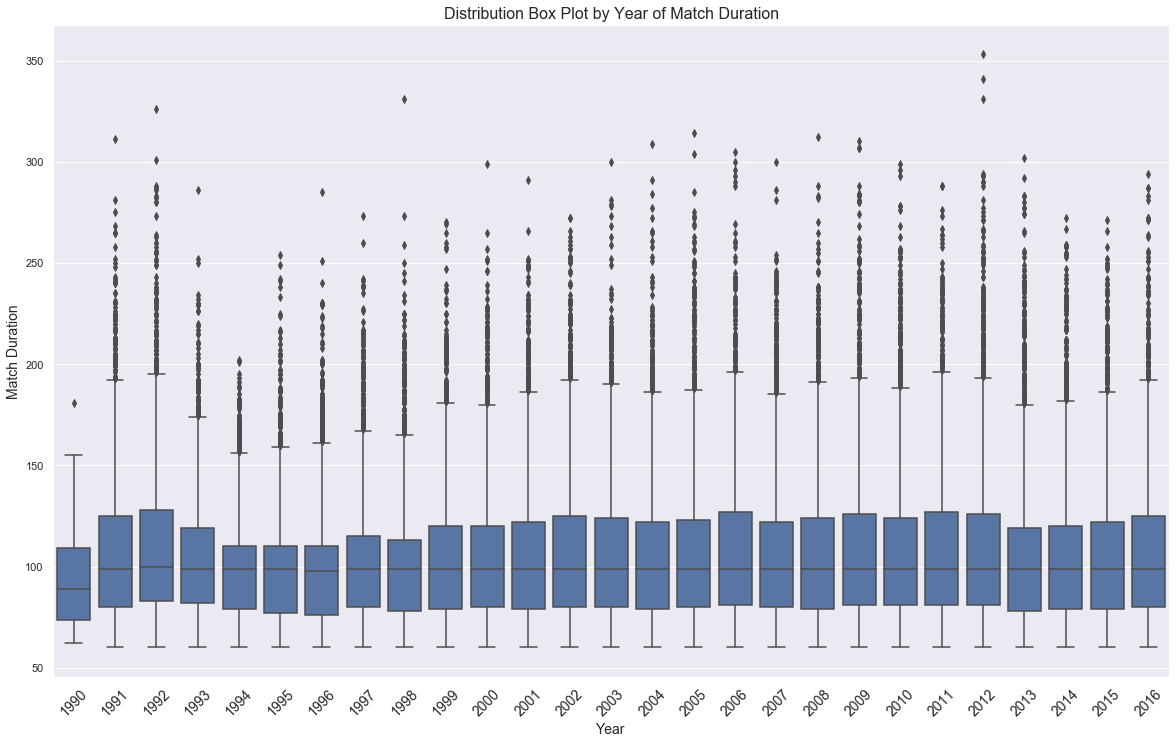

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(20,12))
ax = sns.boxplot(x="year", y="match_duration", data=statsdf,color='b')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=14)
plt.title('Distribution Box Plot by Year of Match Duration',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Match Duration',fontsize=14)
plt.show()
plt.savefig("pics/boxplotmatchdurationbyyear.png")

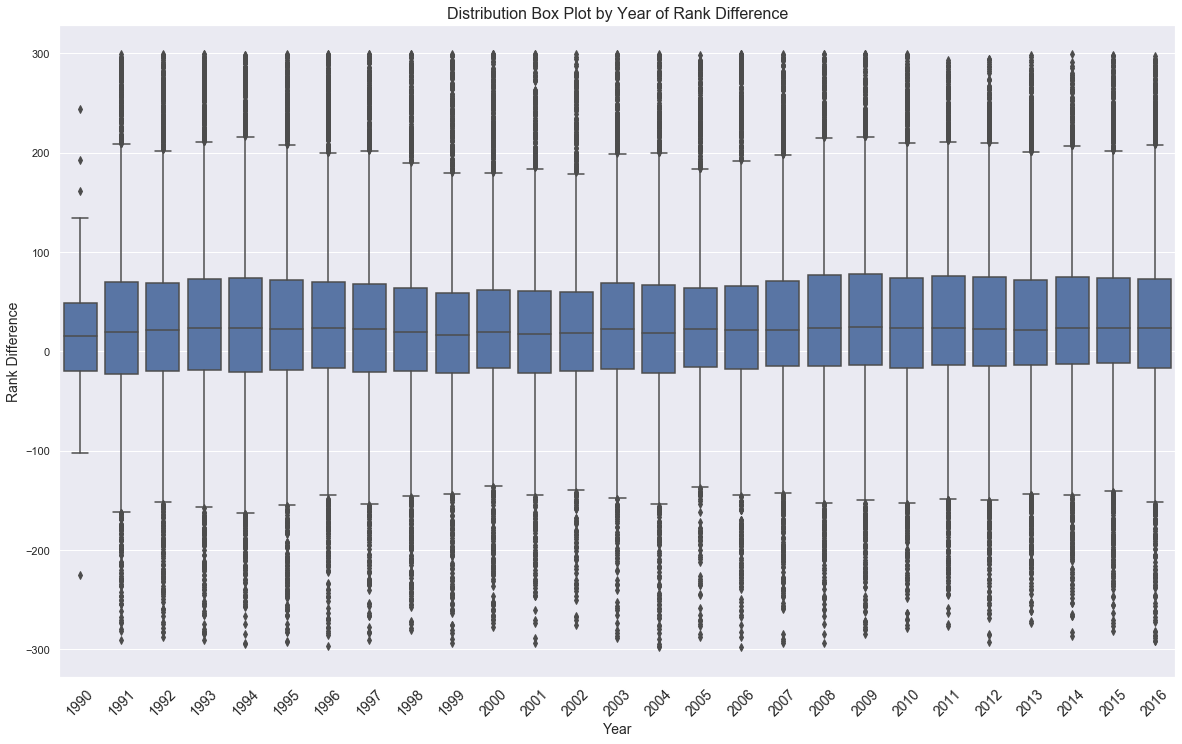

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(20,12))
ax = sns.boxplot(x="year", y="rank_dif", data=statsdf,color='b')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=14)
plt.title('Distribution Box Plot by Year of Rank Difference',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Rank Difference',fontsize=14)
plt.show()
plt.savefig("pics/boxplotrankdifferencebyyear.png")

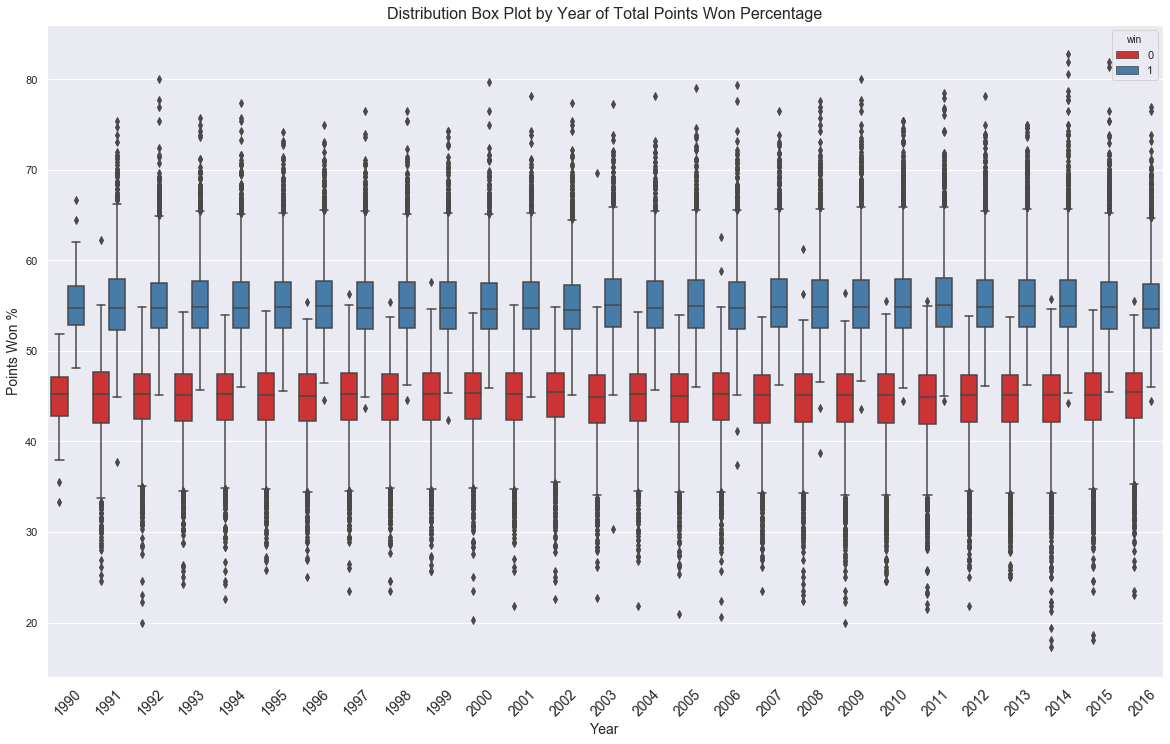

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(20,12))
ax = sns.boxplot(x="year", y="points_won_pct", hue="win", data=results, palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=14)
plt.title('Distribution Box Plot by Year of Total Points Won Percentage',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Points Won %',fontsize=14)
plt.show()
plt.savefig("pics/boxplottotalpointswonbyyear.png")

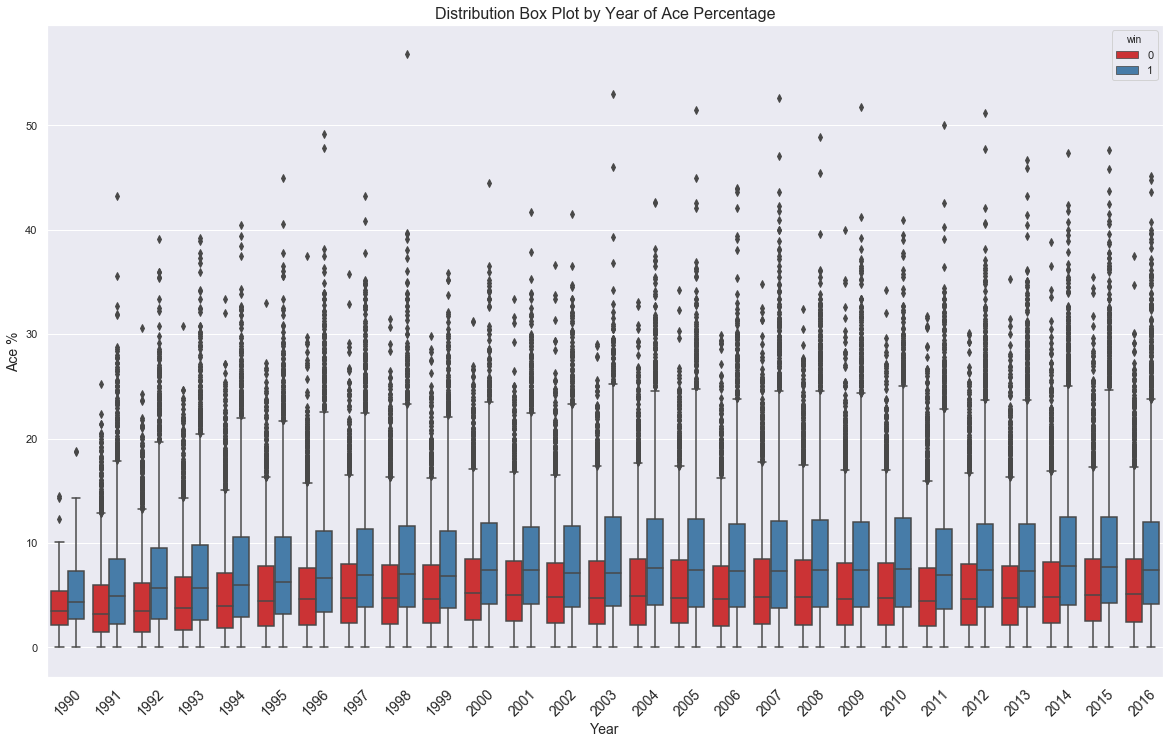

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(20,12))
ax = sns.boxplot(x="year", y="ace_pct", hue="win", data=results, palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=14)
plt.title('Distribution Box Plot by Year of Ace Percentage',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Ace %',fontsize=14)
plt.show()
plt.savefig("pics/boxplotacepercentbyyear.png")

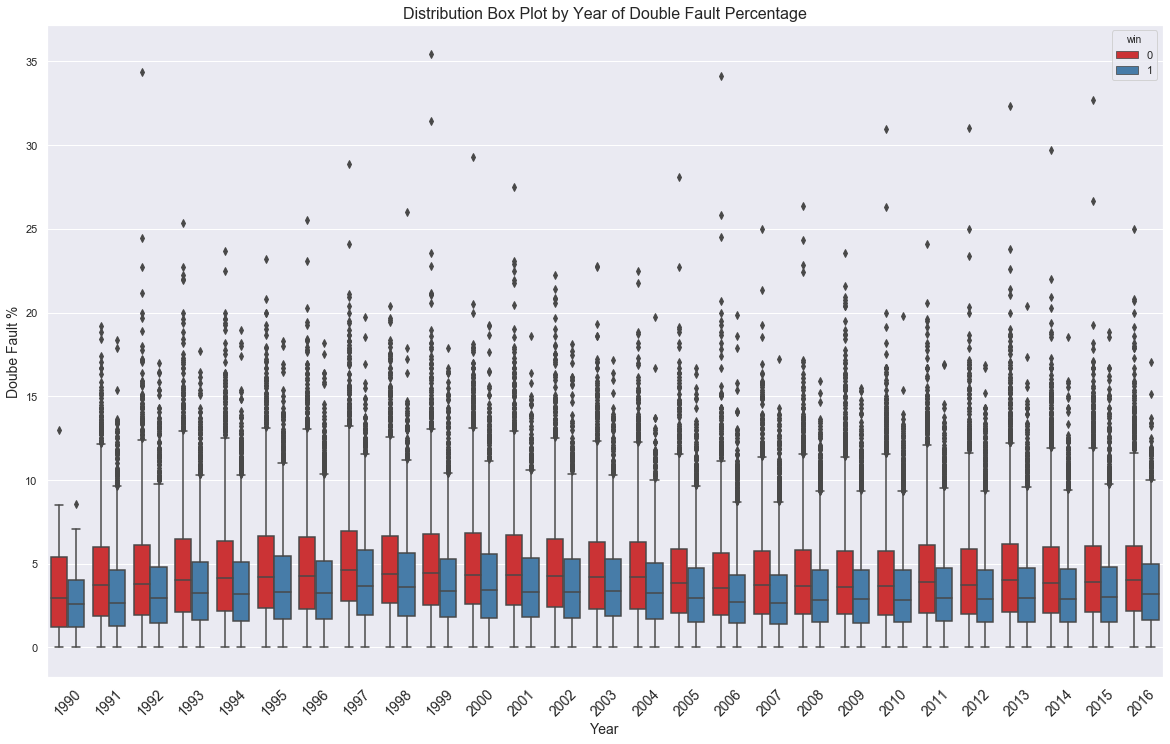

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(20,12))
ax = sns.boxplot(x="year", y="df_pct", hue="win", data=results, palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=14)
plt.title('Distribution Box Plot by Year of Double Fault Percentage',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Doube Fault %',fontsize=14)
plt.show()
plt.savefig("pics/boxplotdfpercentbyyear.png")

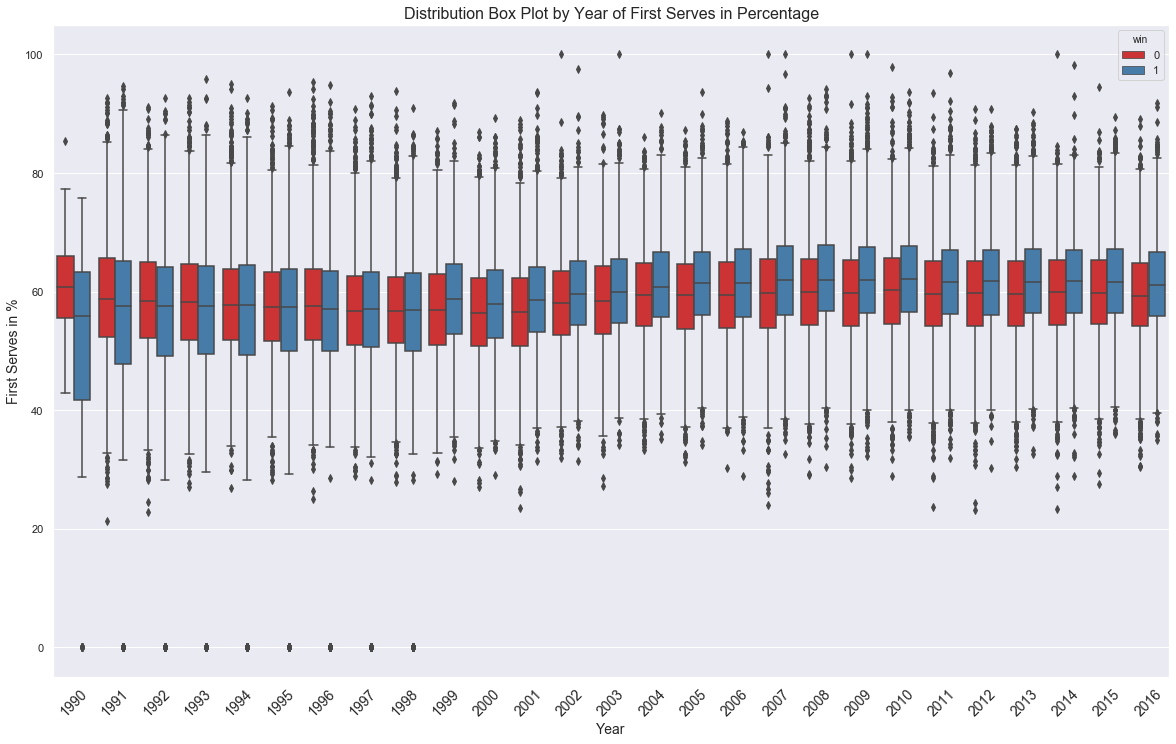

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(20,12))
ax = sns.boxplot(x="year", y="firstsrv_in_pct", hue="win", data=results, palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=14)
plt.title('Distribution Box Plot by Year of First Serves in Percentage',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('First Serves in %',fontsize=14)
plt.show()
plt.savefig("pics/boxplotfirstserveinpercentbyyear.png")

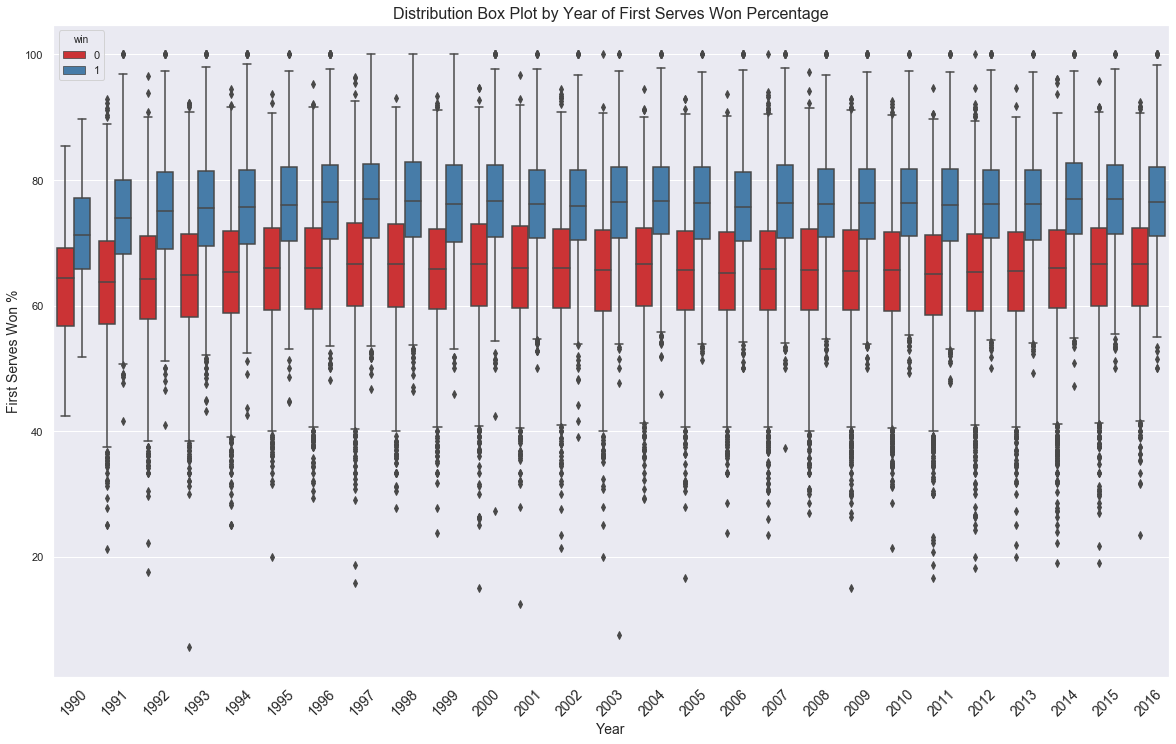

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(20,12))
ax = sns.boxplot(x="year", y="firstsrv_won_pct", hue="win", data=results, palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=14)
plt.title('Distribution Box Plot by Year of First Serves Won Percentage',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('First Serves Won %',fontsize=14)
plt.show()
plt.savefig("pics/boxplotfirstservewonpercentbyyear.png")

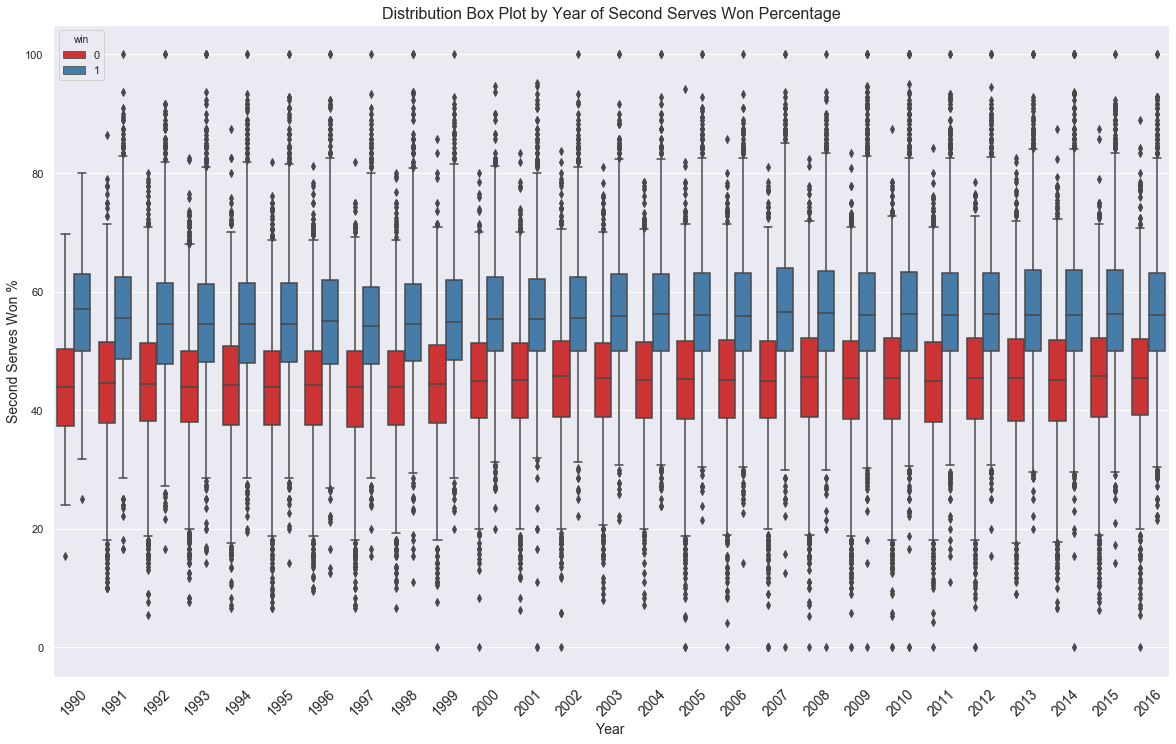

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(20,12))
ax = sns.boxplot(x="year", y="secondsrv_won_pct", hue="win", data=results, palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=14)
plt.title('Distribution Box Plot by Year of Second Serves Won Percentage',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Second Serves Won %',fontsize=14)
plt.show()
plt.savefig("pics/boxplotsecondservewonpercentbyyear.png")

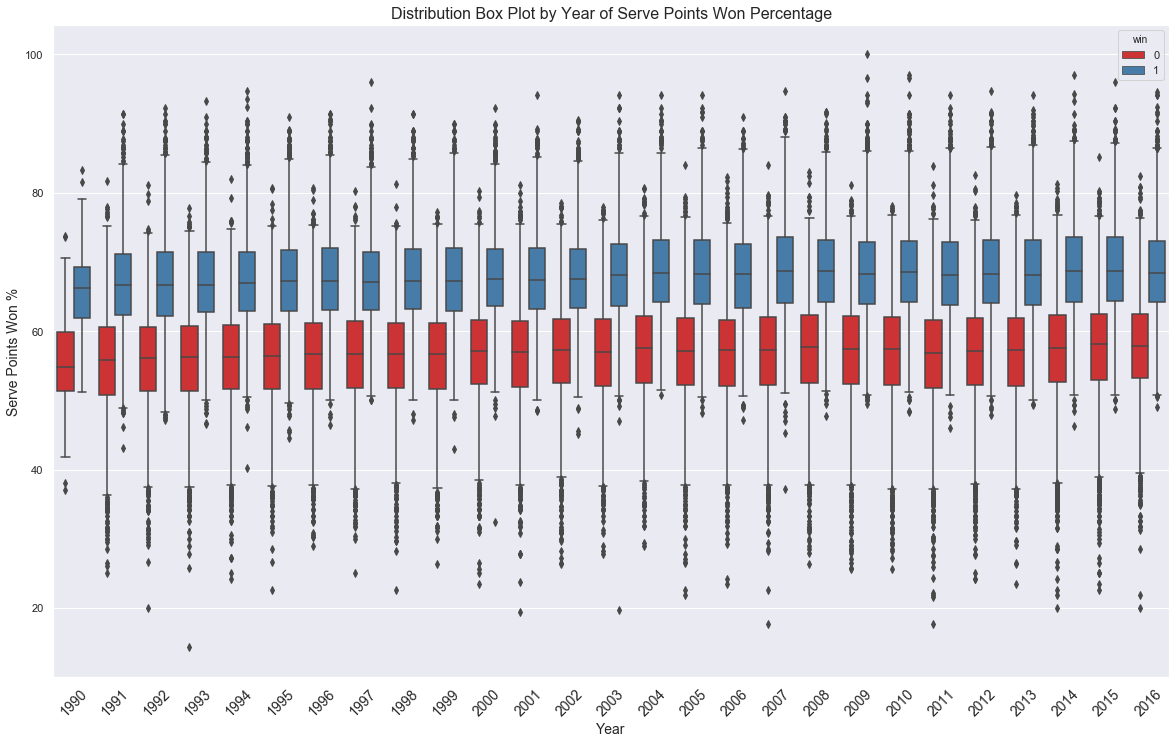

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(20,12))
ax = sns.boxplot(x="year", y="srv_pts_pct", hue="win", data=results, palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=14)
plt.title('Distribution Box Plot by Year of Serve Points Won Percentage',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Serve Points Won %',fontsize=14)
plt.show()
plt.savefig("pics/boxplotserveptswonpercentbyyear.png")

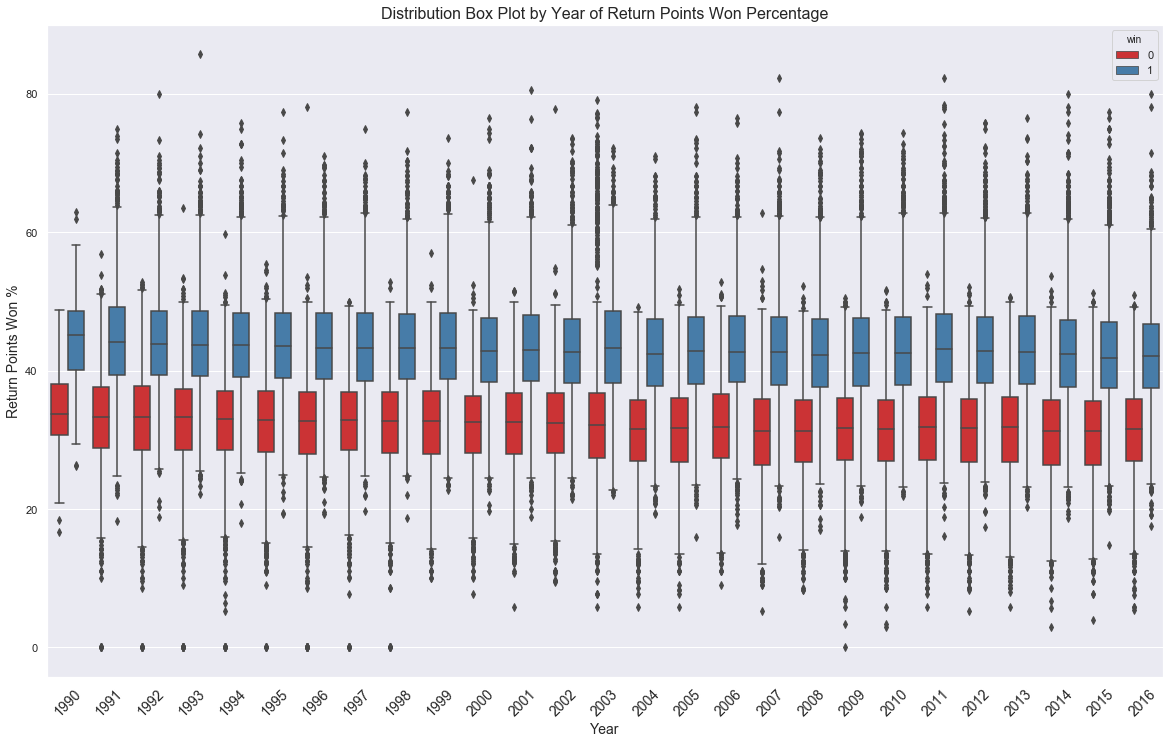

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(20,12))
ax = sns.boxplot(x="year", y="rtn_pts_pct", hue="win", data=results, palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=14)
plt.title('Distribution Box Plot by Year of Return Points Won Percentage',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Return Points Won %',fontsize=14)
plt.show()
plt.savefig("pics/boxplotreturnptswonpercentbyyear.png")

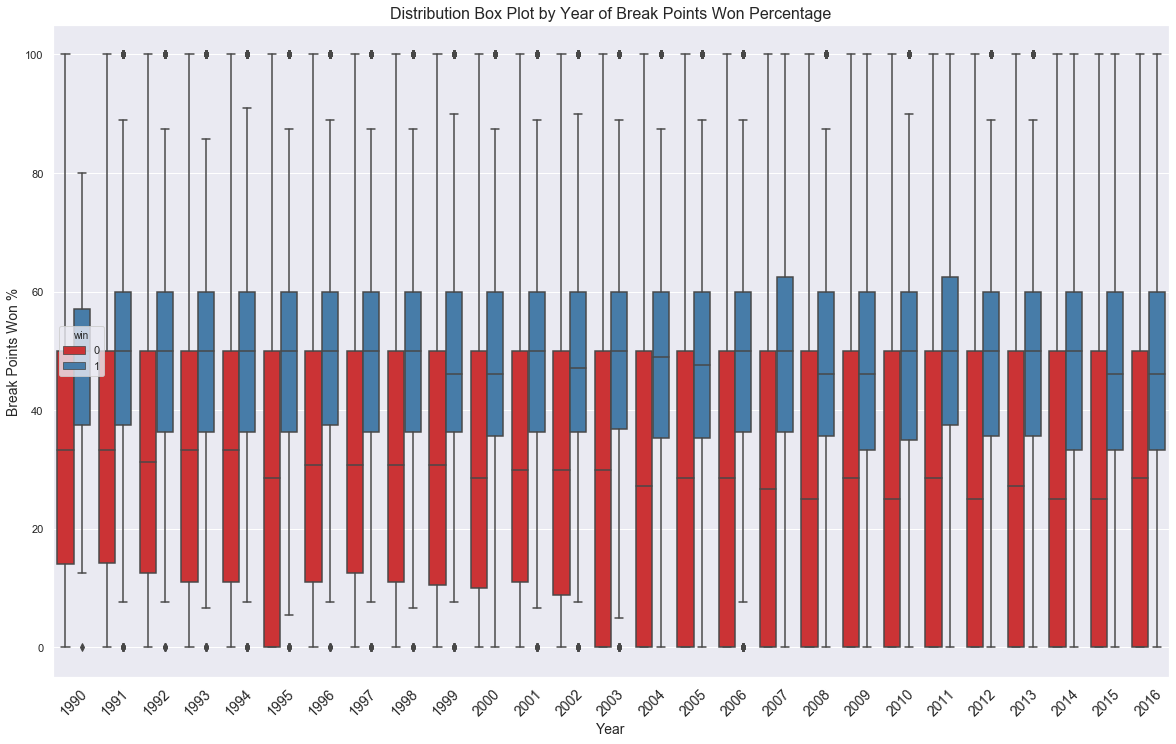

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize=(20,12))
ax = sns.boxplot(x="year", y="brk_pts_pct", hue="win", data=results, palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=14)
plt.title('Distribution Box Plot by Year of Break Points Won Percentage',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Break Points Won %',fontsize=14)
plt.show()
plt.savefig("pics/boxplotbreakptswonpercentbyyear.png")

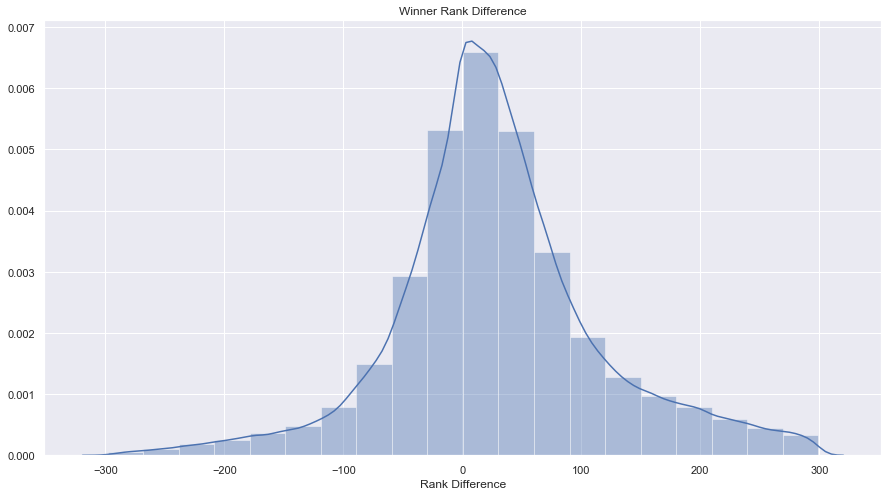

In [31]:
df = statsdf[['rank_dif','winner_rank_number','loser_rank_number']]
# df['sets'] = df['winner_sets_won'] + df['loser_sets_won']

plt.figure(figsize=(15,8))
sns.set(color_codes=True)
sns.distplot(statsdf['rank_dif'],bins=20,axlabel='Rank Difference').set_title('Winner Rank Difference');
plt.savefig("pics/rankdif.png")

In [32]:
df = statsdf[['winner_points_won_pct','loser_points_won_pct']]
x = df[(df.winner_points_won_pct > df.loser_points_won_pct)].count()
y = len(df)
print(x/y)
print(len(df))

winner_points_won_pct    0.942861
loser_points_won_pct     0.942861
dtype: float64
88206


winner_ace_pct    0.638981
loser_ace_pct     0.638981
dtype: float64
88206


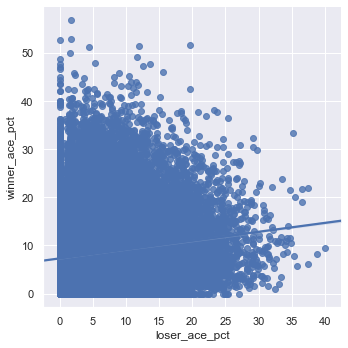

In [33]:
df = statsdf[['winner_ace_pct','loser_ace_pct']]
x = df[(df.winner_ace_pct > df.loser_ace_pct)].count()
print(x/len(df))
print(len(df))
x = 'loser_ace_pct'
y = 'winner_ace_pct'
sns.lmplot(x, y, data=statsdf)
# sns.violinplot(data = df, bw=0.5, orient="h")

winner_df_pct    0.587806
loser_df_pct     0.587806
dtype: float64
88206


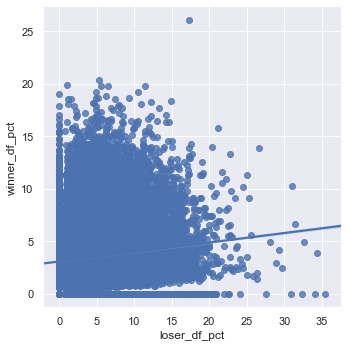

In [34]:
df = statsdf[['winner_df_pct','loser_df_pct']]
x = df[(df.winner_df_pct < df.loser_df_pct)].count()
print(x/len(df))
print(len(df))
x = 'loser_df_pct'
y = 'winner_df_pct'
sns.lmplot(x, y, data=statsdf)
# sns.violinplot(data = df, bw=0.5, orient="h")

winner_firstsrv_in_pct    0.540587
loser_firstsrv_in_pct     0.540587
dtype: float64
88206


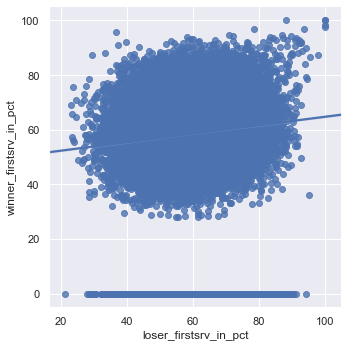

In [35]:
df = statsdf[['winner_firstsrv_in_pct','loser_firstsrv_in_pct']]
x = df[(df.winner_firstsrv_in_pct > df.loser_firstsrv_in_pct)].count()
print(x/len(df))
print(len(df))
x = 'loser_firstsrv_in_pct'
y = 'winner_firstsrv_in_pct'
sns.lmplot(x, y, data=statsdf)
# sns.violinplot(data = df, bw=0.5, orient="h")

winner_firstsrv_won_pct    0.828583
loser_firstsrv_won_pct     0.828583
dtype: float64
88206


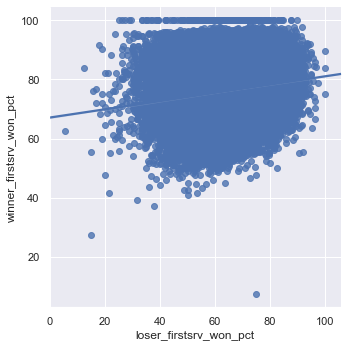

In [36]:
df = statsdf[['winner_firstsrv_won_pct','loser_firstsrv_won_pct']]
x = df[(df.winner_firstsrv_won_pct > df.loser_firstsrv_won_pct)].count()
print(x/len(df))
print(len(df))
x = 'loser_firstsrv_won_pct'
y = 'winner_firstsrv_won_pct'
sns.lmplot(x, y, data=statsdf)
# sns.violinplot(data = df, bw=0.5, orient="h")

winner_secondsrv_won_pct    0.785083
loser_secondsrv_won_pct     0.785083
dtype: float64
88206


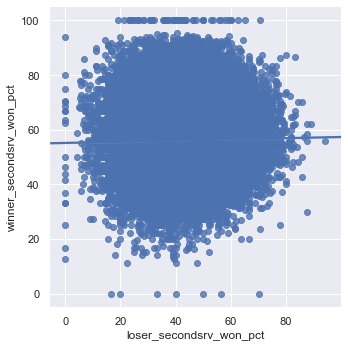

In [37]:
df = statsdf[['winner_secondsrv_won_pct','loser_secondsrv_won_pct']]
x = df[(df.winner_secondsrv_won_pct > df.loser_secondsrv_won_pct)].count()
print(x/len(df))
print(len(df))
x = 'loser_secondsrv_won_pct'
y = 'winner_secondsrv_won_pct'
sns.lmplot(x, y, data=statsdf)
# sns.violinplot(data = df, bw=0.5, orient="h")

winner_srv_pts_pct    0.926853
loser_srv_pts_pct     0.926853
dtype: float64
88206


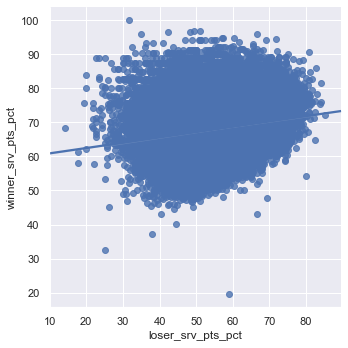

In [38]:
df = statsdf[['winner_srv_pts_pct','loser_srv_pts_pct']]
x = df[(df.winner_srv_pts_pct > df.loser_srv_pts_pct)].count()
print(x/len(df))
print(len(df))
x = 'loser_srv_pts_pct'
y = 'winner_srv_pts_pct'
sns.lmplot(x, y, data=statsdf)
# sns.violinplot(data = df, bw=0.5, orient="h")

winner_rtn_pts_pct    0.925595
loser_rtn_pts_pct     0.925595
dtype: float64
88206


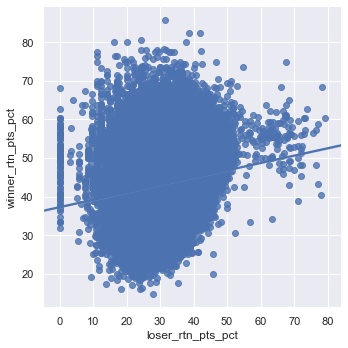

In [39]:
df = statsdf[['winner_rtn_pts_pct','loser_rtn_pts_pct']]
x = df[(df.winner_rtn_pts_pct > df.loser_rtn_pts_pct)].count()
print(x/len(df))
print(len(df))
x = 'loser_rtn_pts_pct'
y = 'winner_rtn_pts_pct'
sns.lmplot(x, y, data=statsdf)
# sns.violinplot(data = df, bw=0.5, orient="h")

winner_brk_pts_pct    0.706585
loser_brk_pts_pct     0.706585
dtype: float64
88206


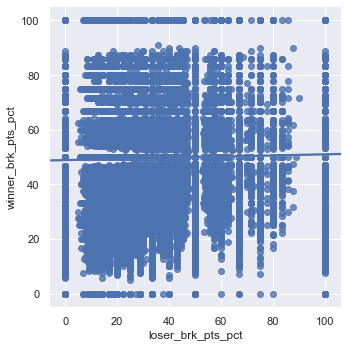

In [40]:
df = statsdf[['winner_brk_pts_pct','loser_brk_pts_pct']]
x = df[(df.winner_brk_pts_pct > df.loser_brk_pts_pct)].count()
print(x/len(df))
print(len(df))
x = 'loser_brk_pts_pct'
y = 'winner_brk_pts_pct'
sns.lmplot(x, y, data=statsdf)
# sns.violinplot(data = df, bw=0.5, orient="h")

#### Now tennis is a bit different from most other professional sports in a couple of ways. First, players don't just try to 'score points'; they 'compete' for points--for every point played, one player wins that point, and the other players 'loses' the point. Unlike baseball, soccer, football, hockey, etc., where teams/players just try to score points, and the team/player with the most points wins. In other words, in tennis if the score is 1-0 (15-Love), and one player wins the next point, the score would be either 1-1 (15-all) or 2-0 (30-Love).

#### Which leads to the second point. Since the difference is potentially a 2- point swing, and because a player needs to win by 2 points in order to win a game, the seemingly small difference in points won per game per match, could potentially change the outcome of a match if a player could improve certain aspects of their game.

### So let's look at the winner statistics.

In [41]:
statsdf.loc[:,main_cols_winner].describe().T

,count,mean,std,min,25%,50%,75%,max
winner_aces,88206.0,6.236208,5.080645,0.0,3.0,5.0,9.0,61.0
winner_double_faults,88206.0,2.728306,2.340481,0.0,1.0,2.0,4.0,23.0
winner_first_serves_in,88206.0,45.306260,20.206875,0.0,32.0,43.0,56.0,194.0
winner_first_serves_total,88206.0,77.114323,28.263841,22.0,56.0,72.0,93.0,258.0
winner_first_serve_points_won,88206.0,35.209612,13.150131,3.0,26.0,33.0,42.0,148.0
winner_first_serve_points_total,88206.0,46.838118,18.370071,9.0,33.0,43.0,57.0,194.0
winner_second_serve_points_won,88206.0,16.605276,6.795583,0.0,12.0,16.0,20.0,65.0
winner_second_serve_points_total,88206.0,30.276206,13.020946,0.0,21.0,28.0,37.0,120.0
winner_break_points_saved,88206.0,3.369091,3.106528,0.0,1.0,3.0,5.0,24.0
winner_break_points_serve_total,88206.0,5.014738,4.107742,0.0,2.0,4.0,7.0,34.0


### Now let's look at the loser statistics.

In [42]:
statsdf.loc[:,main_cols_loser].describe().T

,count,mean,std,min,25%,50%,75%,max
loser_aces,88206.0,4.616579,4.420291,0.0,2.0,3.0,6.0,56.0
loser_double_faults,88206.0,3.513060,2.595205,0.0,2.0,3.0,5.0,26.0
loser_first_serves_in,88206.0,47.233635,18.529821,7.0,34.0,44.0,57.0,196.0
loser_first_serves_total,88206.0,79.926762,28.097246,27.0,59.0,74.0,95.0,273.0
loser_first_serve_points_won,88206.0,31.227252,13.835378,1.0,21.0,29.0,39.0,145.0
loser_first_serve_points_total,88206.0,47.233635,18.529821,7.0,34.0,44.0,57.0,196.0
loser_second_serve_points_won,88206.0,14.838197,7.038972,0.0,10.0,14.0,19.0,66.0
loser_second_serve_points_total,88206.0,32.693127,12.963069,0.0,23.0,30.0,40.0,134.0
loser_break_points_saved,88206.0,4.785922,3.224078,-6.0,2.0,4.0,7.0,28.0
loser_break_points_serve_total,88206.0,8.738782,4.023053,0.0,6.0,8.0,11.0,35.0


### What about the statistical categories we created to compare the differences between winner and loser.

In [43]:
statsdf.loc[:,main_cols_stats].describe().T

,count,mean,std,min,25%,50%,75%,max
rank_dif,88206.0,29.128869,87.778525,-298.000000,-18.000000,22.000000,70.000000,299.000000
winner_ace_pct,88206.0,8.340684,6.336654,0.000000,3.676471,6.976744,11.538462,56.756757
loser_ace_pct,88206.0,5.599402,4.661899,0.000000,2.127660,4.587156,7.865169,40.000000
ace_dif,88206.0,2.741282,7.339634,-31.668052,-1.708619,2.085035,6.666667,55.002371
winner_df_pct,88206.0,3.471327,2.647796,0.000000,1.612903,3.076923,4.938272,26.027397
loser_df_pct,88206.0,4.511130,3.174744,0.000000,2.150538,4.000000,6.250000,35.416667
df_dif,88206.0,-1.039803,3.907960,-35.416667,-3.340081,-0.891303,1.458333,18.987342
winner_firstsrv_in_pct,88206.0,58.351252,14.343813,0.000000,54.054054,60.112715,66.019417,100.000000
loser_firstsrv_in_pct,88206.0,58.864649,8.704818,21.276596,53.061224,58.762887,64.583333,100.000000
firstsrv_in_dif,88206.0,-0.513397,16.062541,-94.252874,-6.781920,1.209677,8.834452,59.333001


### So it looks like the winner did better in every category, although some of the differences (aces and double faults) are relatively small. Note that For double faults, 'df_dif', is negative, which means the winner had fewer double faults than the loser, which is better.)

### Let's visually examine the differences between the winners' and losers' statistics in the other five categories I created. (We looked at total points won percentage already.)

# Exploring

In [44]:
results1 = pd.DataFrame([results.year,results.match_duration, results.ace_pct, results.df_pct, results.firstsrv_in_pct, results.firstsrv_won_pct,
                         results.secondsrv_won_pct, results.srv_pts_pct, results.rtn_pts_pct, results.brk_pts_pct, results.points_won_pct, results.win]).transpose()

In [45]:
results1.head()

,year,match_duration,ace_pct,df_pct,firstsrv_in_pct,firstsrv_won_pct,secondsrv_won_pct,srv_pts_pct,rtn_pts_pct,brk_pts_pct,points_won_pct,win
0,1990.0,66.0,4.166667,2.083333,60.416667,89.655172,63.157895,79.166667,41.071429,25.000000,58.653846,1.0
1,1990.0,66.0,5.357143,5.357143,75.000000,64.285714,42.857143,58.928571,20.833333,0.000000,41.346154,0.0
2,1990.0,147.0,3.191489,2.127660,59.574468,66.071429,55.263158,61.702128,39.622642,20.000000,50.000000,1.0
3,1990.0,147.0,3.773585,0.943396,67.924528,58.333333,64.705882,60.377358,38.297872,50.000000,50.000000,0.0
4,1990.0,68.0,4.081633,2.040816,75.510204,67.567568,50.000000,63.265306,54.545455,54.545455,58.653846,1.0


In [46]:
results1.groupby('win').mean()

,year,match_duration,ace_pct,df_pct,firstsrv_in_pct,firstsrv_won_pct,secondsrv_won_pct,srv_pts_pct,rtn_pts_pct,brk_pts_pct,points_won_pct
win,,,,,,,,,,,
0.0,2004.223012,104.614777,5.599402,4.511130,58.864649,65.354815,44.723647,56.694481,31.802591,31.585153,44.532477
1.0,2004.223012,104.614777,8.340684,3.471327,58.351252,76.232252,56.121267,68.222500,43.319388,49.534994,55.467523


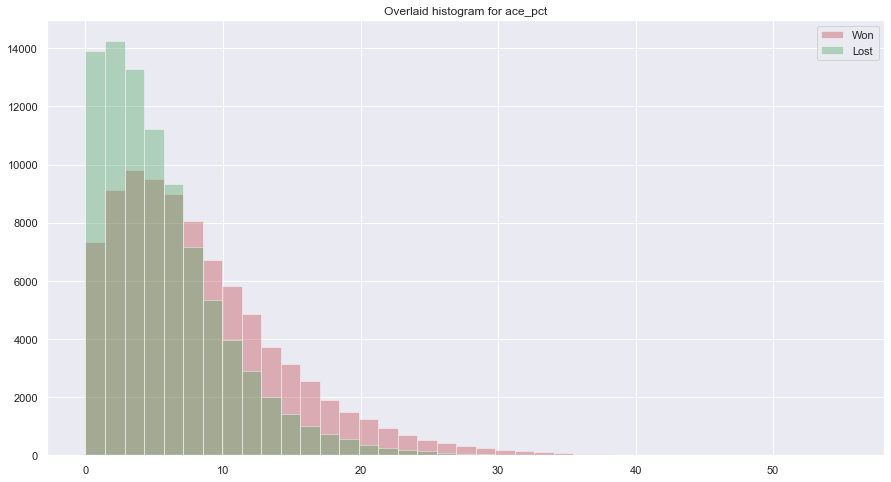

NameError: name 'paste' is not defined

In [47]:
for i in ['ace_pct','df_pct','firstsrv_in_pct','firstsrv_won_pct','secondsrv_won_pct','srv_pts_pct','rtn_pts_pct','brk_pts_pct','points_won_pct']:
    plt.figure(figsize=(15,8))
    won = list(results1[results1['win'] == 1][i])
    lost = list(results1[results1['win'] == 0][i])
    xmin = min(min(won), min(lost))
    xmax = max(max(won), max(lost))
    width = (xmax - xmin) / 40
    sns.distplot(won, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(lost, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Won','Lost'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()
    filename = paste("pics/histogram", i, ".png",sep="")
    plt.savefig(filename)

### Ace Percentage

In [ ]:
ace_stats_columns = ['winner_ace_pct','loser_ace_pct']
ace_stats_df = pd.DataFrame(statsdf[ace_stats_columns])
new_columns = ['Winner', 'Loser']
ace_stats_df.columns = new_columns
ace_stats_df.describe().T

In [ ]:
ax = sns.violinplot(data = ace_stats_df, bw=0.5, orient="h")
ax.set_title('% Service Aces Distribution')
plt.savefig("acepercentviolinplot.png")

In [ ]:
plt.figure(figsize=(20,12))
ax = sns.violinplot(x="year", y="ace_pct", hue="win", data=results)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=14)
plt.title('Distribution Box Plot by Year of Ace Percentage',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Ace %',fontsize=14)
plt.show()
plt.savefig("pics/violinplotacepercentbyyear.png")

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="year", y="ace_pct", hue="win", data=results, palette="Set1")
#sns.plt.show()

### Double Fault Percentage

In [ ]:
# Pre-format DataFrame
doublefault_stats_columns = ['winner_df_pct','loser_df_pct']
doublefault_stats_df = pd.DataFrame(statsdf[doublefault_stats_columns])
new_columns = ['Winner', 'Loser']
doublefault_stats_df.columns = new_columns
doublefault_stats_df.describe().T

In [ ]:
ax = sns.violinplot(data = doublefault_stats_df, bw=0.5, orient="h")
ax.set_title('% Double Faults Distribution')
plt.savefig("dfpercentviolinplot.png")

### Service Points Won Percentage

In [ ]:
# Pre-format DataFrame
servicepoints_stats_columns = ['winner_srv_pts_pct','loser_srv_pts_pct']
servicepoints_stats_df = pd.DataFrame(statsdf[servicepoints_stats_columns])
new_columns = ['Winner', 'Loser']
servicepoints_stats_df.columns = new_columns
servicepoints_stats_df.describe().T

In [ ]:
ax = sns.violinplot(data = servicepoints_stats_df, bw=0.5, orient="h")
ax.set_title('% Service Points Won Distribution')
plt.savefig("serviceptspctviolinplot.png")

### Return Points Won Percentage

In [ ]:
# Pre-format DataFrame
returnpoints_stats_columns = ['winner_rtn_pts_pct','loser_rtn_pts_pct']
returnpoints_stats_df = pd.DataFrame(statsdf[returnpoints_stats_columns])
new_columns = ['Winner', 'Loser']
returnpoints_stats_df.columns = new_columns
returnpoints_stats_df.describe().T

In [ ]:
ax = sns.violinplot(data = returnpoints_stats_df, bw=0.5, orient="h")
ax.set_title('% Return Points Won Distribution')
plt.savefig("returnptspctviolinplot.png")

### Break Points Won Percentage

In [ ]:
# Pre-format DataFrame
breakpoints_stats_columns = ['winner_brk_pts_pct','loser_brk_pts_pct']
breakpoints_stats_df = pd.DataFrame(statsdf[breakpoints_stats_columns])
new_columns = ['Winner', 'Loser']
breakpoints_stats_df.columns = new_columns
breakpoints_stats_df.describe().T

In [ ]:
ax = sns.violinplot(data = breakpoints_stats_df, bw=0.5, orient="h")
ax.set_title('% Break Points Won Distribution')
plt.savefig("breakptspctviolinplot.png")

## Total Points Won Percentage

In [ ]:
total_points_won_columns = ['winner_points_won_pct','loser_points_won_pct']
total_points_df = pd.DataFrame(statsdf[total_points_won_columns])
new_columns = ['Winner', 'Loser']
total_points_df.columns = new_columns
total_points_df.describe().T

In [ ]:
ax = sns.violinplot(data = total_points_df, bw=0.5, orient="h")
ax.set_title('% Total Points Won Distribution')
plt.savefig("totalptswonpctviolinplot.png")

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="year", y="points_won_pct", hue="win", data=results, palette="Set1")
#sns.plt.show()